![images](https://user-images.githubusercontent.com/42184553/55184987-7a4f1400-51a4-11e9-8476-750bd7160da2.png)

#   Communicate Data Findings
# Flights Datasets  - Exploration
#### Project - Data Analyst Nanodegree
#### Udacity - July 12, 2019
#### Alaa Alaboud - Dhahran - KSA

## Introduction





### Flights Datasets

This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008.

You can Download the Flights dataset from this link.
[Flights Datasets](http://stat-computing.org/dataexpo/2009/the-data.html)

You can see more detail for this dataset in RITA from this link.
[RITA - Detailed Variable Descriptions](https://www.transtats.bts.gov/Fields.asp?Table_ID=236)

A Google Doc download option with identical info is available below as well.
[Google Doc Download](https://docs.google.com/document/d/e/2PACX-1vQmkX4iOT6Rcrin42vslquX2_wQCjIa_hbwD0xmxrERPSOJYDtpNc_3wwK_p9_KpOsfA6QVyEHdxxq7/pub?embedded=True)


### Get the data

- we cleaned six years of flights datasets to use it in our investigate.
- our main datasets is `df_2008_clean`.
- We merged before these two data of flights years `1987.csv` and `1989.csv` after cleaning in this file `Flights_80.csv`. 
- We merged before these two data of flights years `1990.csv` and `1999.csv` after cleaning in this file `Flights_90.csv`.
- We merged before these two data of flights years `2000.csv` and `2008.csv` after cleaning in this file `Flights_20.csv`.


## Preliminary Wrangling

First, we need to **import** all packages needed in this project.

In [1]:
# Import all packages we needed
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from matplotlib import dates
import seaborn as sb
from calendar import day_abbr

This dataset `carriers.csv` contains the full name for carriers code

In [3]:
# Load Dataset carriers.csv
carriers_ = pd.read_csv('carriers.csv', encoding = 'utf-8')
carriers_.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


This dataset `L_AIRPORT.csv_` contains the full name for Airport for the origin IATA airport code, and the destination IATA airport code.

In [4]:
# Load Dataset L_AIRPORT.csv
L_AIRPORT = pd.read_csv('L_AIRPORT.csv_', encoding = 'utf-8')
L_AIRPORT.head()

,Code,Description
0,01A,"Afognak Lake, AK: Afognak Lake Airport"
1,03A,"Granite Mountain, AK: Bear Creek Mining Strip"
2,04A,"Lik, AK: Lik Mining Camp"
3,05A,"Little Squaw, AK: Little Squaw Airport"
4,06A,"Kizhuyak, AK: Kizhuyak Bay"


We will load the cleaned dataset `df_2008_clean.csv`, and it will be the main dataset in our investigate.

In [5]:
# Load Dataset df_2008_clean.csv
df_2008_clean = pd.read_csv('df_2008_clean.csv', encoding = 'utf-8')

In [6]:
df_2008_clean.head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ArrDelay,DepDelay,Origin,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,date,weekday
0,2003.0,1955,2211.0,2225,WN,335,N712SW,-14.0,8.0,IAD,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,Thursday
1,754.0,735,1002.0,1000,WN,3231,N772SW,2.0,19.0,IAD,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,Thursday
2,628.0,620,804.0,750,WN,448,N428WN,14.0,8.0,IND,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,Thursday
3,926.0,930,1054.0,1100,WN,1746,N612SW,-6.0,-4.0,IND,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,Thursday
4,1829.0,1755,1959.0,1925,WN,3920,N464WN,34.0,34.0,IND,...,0,NaN,0,2.0,0.0,0.0,0.0,32.0,2008-01-03,Thursday


In [7]:
df_2008_clean.tail()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ArrDelay,DepDelay,Origin,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,date,weekday
7009723,1002.0,959,1204.0,1150,DL,1636,N646DL,14.0,3.0,ATL,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-12-13,Saturday
7009724,834.0,835,1021.0,1023,DL,1637,N908DL,-2.0,-1.0,ATL,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-12-13,Saturday
7009725,655.0,700,856.0,856,DL,1638,N671DN,0.0,-5.0,PBI,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-12-13,Saturday
7009726,1251.0,1240,1446.0,1437,DL,1639,N646DL,9.0,11.0,IAD,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-12-13,Saturday
7009727,1110.0,1103,1413.0,1418,DL,1641,N908DL,-5.0,7.0,SAT,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-12-13,Saturday


In [8]:
df_2008_clean.shape

(7009728, 22)

In [9]:
df_2008_clean.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 22 columns):
DepTime              6873482 non-null float64
CRSDepTime           7009728 non-null int64
ArrTime              6858079 non-null float64
CRSArrTime           7009728 non-null int64
UniqueCarrier        7009728 non-null object
FlightNum            7009728 non-null int64
TailNum              6926363 non-null object
ArrDelay             6855029 non-null float64
DepDelay             6873482 non-null float64
Origin               7009728 non-null object
Dest                 7009728 non-null object
Distance             7009728 non-null float64
Cancelled            7009728 non-null int64
CancellationCode     137434 non-null object
Diverted             7009728 non-null int64
CarrierDelay         1524735 non-null float64
WeatherDelay         1524735 non-null float64
NASDelay             1524735 non-null float64
SecurityDelay        1524735 non-null float64
LateAircraftDelay    1524735 

In [10]:
df_2008_clean.describe()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ArrDelay,DepDelay,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,6.873482e+06,7.009728e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,6.873482e+06,7.009728e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224200e+03,8.168452e+00,9.972570e+00,7.263870e+02,1.960618e-02,2.463006e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,3.850194e+01,3.531127e+01,5.621018e+02,1.386426e-01,4.956753e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-5.190000e+02,-5.340000e+02,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,-1.000000e+01,-4.000000e+00,3.250000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,-2.000000e+00,-1.000000e+00,5.810000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.200000e+01,8.000000e+00,9.540000e+02,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,2.461000e+03,2.467000e+03,4.962000e+03,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


## Extra data for our investigation

We will load the three merged and cleaned datasets `Flights_80.csv`,`Flights_90.csv`,`Flights_20.csv`.

In [11]:
# Load Dataset Flights_80.csv

Flights_80 = pd.read_csv('Flights_80.csv', encoding = 'utf-8')

In [13]:
# Load Dataset Flights_90.csv

Flights_90 = pd.read_csv('Flights_90.csv', encoding = 'utf-8')

In [15]:
# Load Dataset Flights_20.csv

Flights_20 = pd.read_csv('Flights_20.csv', encoding = 'utf-8')

### The structure of the dataset

There are 700,977 flights in the United States in our dataset for the 2008 year after we make our Wrangling on it we keep the dataset with 23 features like LateAircraftDelay, UniqueCarrier, FlightNum, ArrDelay, Origin ... etc. 
The most variables are numeric in the dataset between integer and float, and the rest are a string object.

#### Variable descriptions
- #### Name - Description


- 1	**date** - year:2008, month: 1-12, day: 1-31
- 2	**weekday** - 1 (Monday) - 7 (Sunday)
- 3	**DepTime** - actual departure time (local, hhmm)
- 4	**CRSDepTime** - scheduled departure time (local, hhmm)
- 5	**ArrTime** - actual arrival time (local, hhmm)
- 6	**CRSArrTime** - scheduled arrival time (local, hhmm)
- 7	**UniqueCarrier** - unique carrier code
- 8	**FlightNum** - flight number
- 9**TailNum** - plane tail number
- 10 **AirTime** - in minutes
- 11**ArrDelay** - arrival delay, in minutes
- 12**DepDelay** - departure delay, in minutes
- 13**Origin** - origin IATA airport code
- 14**Dest** - destination IATA airport code
- 15**Distance** - in miles
- 16**Cancelled** - was the flight cancelled?
- 17**CancellationCode** - reason for cancellation (A = carrier, B = weather, C = NAS "National Air System", D = security)
- 18**Diverted** - 1 = yes, 0 = no
- 19**CarrierDelay** - in minutes
- 20**WeatherDelay** - in minutes
- 21**NASDelay** - in minutes
- 22**SecurityDelay** - in minutes
- 23**LateAircraftDelay** - in minutes


### The main features of interest in the dataset

In our investigation we most interested in figuring out the delay for the tack off of flights, the reason for cancelation flights, the preferred times for flights to occur and if there any changes over multiple years and we have some of the interest in some subject that we put them in questions below:


### Questions

#### 1. insight
- The most delay time for the 2008 year for the flights and its information?
- What's the most reason to cancelation flights?
- What is the less reason to cancelation flights?
- The most carrier flights.
- The most carrier in cancelation flights.
- The most weekday for the flights and the less weekday
- The most month for the flights and the less month.
- The most day for the flights and the less day.
- What are the preferred times for flights to occur? Are there any changes over multiple years.



#### 2. insight
- The relationship for arrival delay and departure delay with distance.
- The relationship between the weekday for flights with distance.   


#### 3. insight

- Are there a certain destination or arrival cities that are home to more delays with different distance?


### The features in the dataset that we  think will help support our investigation into our features of interest

We expect that in our **first insight**, we will use these columns to answer our questions: `UniqueCarrier`, `weekday`, `CancellationCode`, `Cancelled`, `date`, `CRSArrTime`, `LateAircraftDelay`.

In the **second insight**, we will use: `ArrDelay`, `weekday`, `Distance`.

In the **third insight**, we will use these columns: `Distance`, `LateAircraftDelay`, `Dest`.

## Exploratory Data Analysis

## Univariate Exploration

In our dataset, **wrangling** we found some data that we can merge, change formats and drop some un-useless columns. 

Also, we merged cleaned datasets for different years by generation to use it in our investigate. 

You can find the details of our wrangling on the datasets in this file `wrangling_Flights.ipynb`.


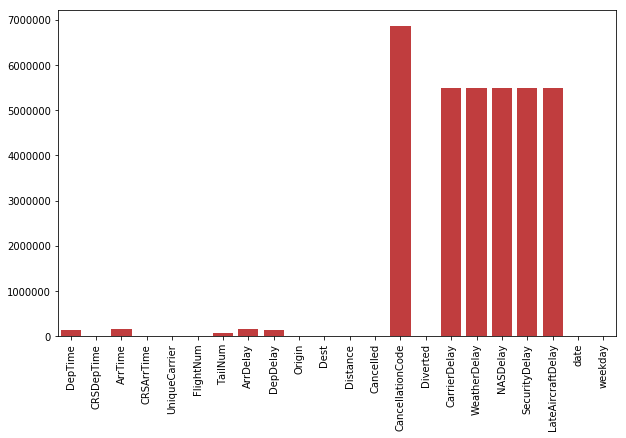

In [16]:
# bar chart for the number of the null values in our dataset

null_cunt = df_2008_clean.isna().sum()
base_color = sb.color_palette()[3]
plt.figure(figsize=(10,6))
sb.barplot(null_cunt.index.values, null_cunt, color = base_color)
plt.xticks(rotation = 90);

### The most delay time for the 2008 year for the flights and its information?

In [17]:
# five largest values in column `LateAircraftDelay`
df_2008_clean.nlargest(5, ['LateAircraftDelay']) 

,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ArrDelay,DepDelay,Origin,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,date,weekday
4099781,1241.0,1445,2110.0,2305,AA,284,N392AA,1325.0,1316.0,HNL,...,0,NaN,0,0.0,0.0,9.0,0.0,1316.0,2008-07-30,Wednesday
5039477,1828.0,2045,304.0,502,UA,68,N548UA,1322.0,1303.0,LIH,...,0,NaN,0,0.0,0.0,19.0,0.0,1303.0,2008-09-03,Wednesday
1426738,1013.0,1305,1322.0,1615,UA,1051,N597UA,1267.0,1268.0,SEA,...,0,NaN,0,13.0,0.0,0.0,0.0,1254.0,2008-03-29,Saturday
6308375,938.0,1300,1313.0,1620,MQ,4508,N848MQ,1253.0,1238.0,MEM,...,0,NaN,0,2.0,0.0,15.0,0.0,1236.0,2008-11-30,Sunday
1620103,258.0,705,809.0,1220,NW,804,N593NW,1189.0,1193.0,SEA,...,0,NaN,0,5.0,0.0,0.0,0.0,1184.0,2008-03-02,Sunday


In [18]:
# To check the row of `4099781`  info
with pd.option_context('max_colwidth', 50):
    display(df_2008_clean.loc[4099781,:])

DepTime                    1241
CRSDepTime                 1445
ArrTime                    2110
CRSArrTime                 2305
UniqueCarrier                AA
FlightNum                   284
TailNum                  N392AA
ArrDelay                   1325
DepDelay                   1316
Origin                      HNL
Dest                        LAX
Distance                   2556
Cancelled                     0
CancellationCode            NaN
Diverted                      0
CarrierDelay                  0
WeatherDelay                  0
NASDelay                      9
SecurityDelay                 0
LateAircraftDelay          1316
date                 2008-07-30
weekday               Wednesday
Name: 4099781, dtype: object

In [19]:
# To convert the int number as an hour and minute to time type

def convert(minutes): 
    minutes = minutes  % (24 * 60)
    hour = minutes // 60
    minutes %= 60

    return "%d:%02d" % (hour, minutes) 
      
# Run program 
number = 1316
print("The most delay time for this year for the flights in an hour format is",convert(number),"hours") 

The most delay time for this year for the flights in an hour format is 21:56 hours


In [20]:
# search in where Code ==  AA
carriers_[carriers_['Code'].str.match('AA', na=False)]

,Code,Description
100,AA,American Airlines Inc.
101,AAA,Associated Aviation Act.
102,AAB,Antilles Air Boats Inc.
103,AAE,AAA Airlines
104,AAI,Audi Air Inc.
105,AAL,Argosy Air Lines Inc.
106,AAP,Armstrong Air Service Inc.
107,AAQ,Advance Air Charters
108,AAR,Altair Airlines Inc.
109,AAT,Air Sunshine Inc.


In [21]:
# search in where Code == HNL
L_AIRPORT[L_AIRPORT['Code'].str.match('HNL', na=False)]

,Code,Description
2268,HNL,"Honolulu, HI: Daniel K Inouye International"


In [22]:
# search in where Code == LAX
L_AIRPORT[L_AIRPORT['Code'].str.match('LAX', na=False)]

,Code,Description
2994,LAX,"Los Angeles, CA: Los Angeles International"


- We can see above that the most delay flights for the **2008** year is **21:56** hours.
- The destination for that flight was from **Honolulu(HNL)** to **Los Angeles(LAX)** and the delay was in departure and arrival flight.
- The Distance was **2556** miles, and the date for this flight was in **2008-07-30** on **wednesday**.
- The scheduled departure time local was at **14:45 pm**, but the actual departure time was at **12:41 pm**.
- And the scheduled arrival time was at **23:05 pm**, but the actual arrival time was at **21:10 pm**.
- And the carrier was **American Airlines Inc.(AA)** and the flight FlightNum **(284)** and TailNum **(N392AA)**.
- As the information we found, the **National Air System(NAS)** got **9** minutes in delay, and we cant figure out the other reason for delay.

### What's the most reason to cancelation flights? , and What is the less reason?

In [23]:
# count of Cancellation Code type
cancelation_ = df_2008_clean['CancellationCode'].value_counts()
cancelation_

B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64

In [24]:
54904 - 54330

574

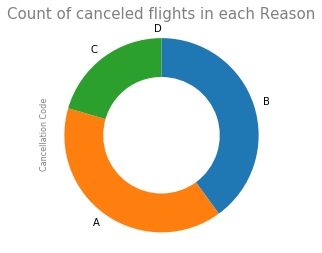

In [25]:
# pie plot for count of Cancellation Code type
sorted_counts = df_2008_clean['CancellationCode'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');
# Add a title of chart and for x, y labels
plt.title('Count of canceled flights in each Reason', fontsize=15, color='grey')
plt.ylabel('Cancellation Code', fontsize=8, color='grey')

# save
plt.savefig('CancellationCode_count', dpi=70, bbox_inches='tight');

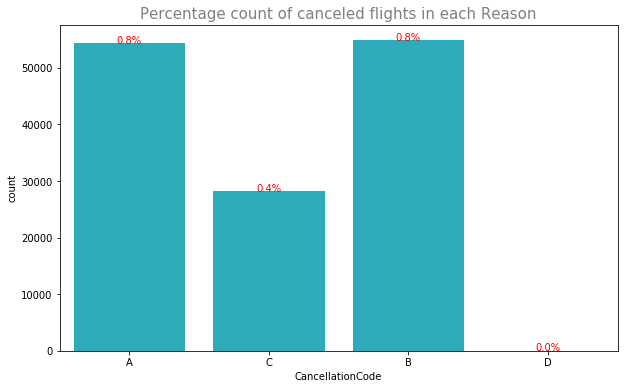

In [26]:
# create the bar plot for count of Cancellation Code type
plt.figure(figsize=(10,6))
base_color = sb.color_palette()[9]
sb.countplot(data = df_2008_clean, x = 'CancellationCode', color = base_color)

# add annotations
n_points = df_2008_clean.shape[0]
cat_counts = df_2008_clean['CancellationCode'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'r')
    
plt.title('Percentage count of canceled flights in each Reason', fontsize=15, color='grey')

# save
plt.savefig('CancellationCode_annotations', dpi=70, bbox_inches='tight');

- We found the most reason to cancelation the flight is the **weather(B)**.
- And the less reason is the **security(D)** with just **12** canceled flights.
- And also from the information we found, above, the second reason was the **carriers(A)** and it got **8%** from the database in cancellations type, likewise to the weather with the same percentage and difference in **574** canceled flights.
- And the  **National Air System(C)** reason got **4%** in our database that's a half percentage for weather and carriers reason.

### The most carrier flights.

In [27]:
# value count for the Carriers
df_2008_clean['UniqueCarrier'].value_counts()

WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
EV     280575
9E     262208
FL     261684
YV     254930
OH     197607
B6     196091
AS     151102
F9      95762
HA      61826
AQ       7800
Name: UniqueCarrier, dtype: int64

In [28]:
1201754 - 604885

596869

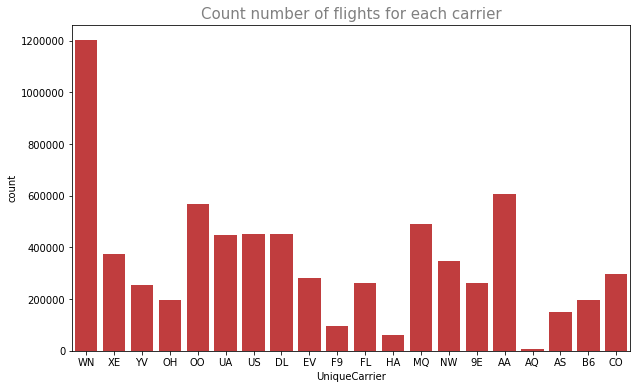

In [29]:
# bar chart for value count for the Carriers
base_color = sb.color_palette()[3]
plt.figure(figsize=(10,6))
sb.countplot(data = df_2008_clean, x = 'UniqueCarrier', color = base_color);

plt.title('Count number of flights for each carrier', fontsize=15, color='grey')

# save
plt.savefig('value_count_for_Carriers', dpi=70, bbox_inches='tight');

In [30]:
# search in where Code == WN
carriers_[carriers_['Code'].str.match('WN', na=False)]

,Code,Description
1388,WN,Southwest Airlines Co.
1389,WNG,Wings Airways
1390,WNQ,Winair Inc.


In [31]:
# search in where Code == AQ
carriers_[carriers_['Code'].str.match('AQ', na=False)]

,Code,Description
206,AQ,Aloha Airlines Inc.
207,AQQ,Air Charter (Safa)


- Here, we see the **Southwest Airlines Co.(WN)** carrier recorded as the most carrier flights in **2008** at the United States with **1201754** flights, with the difference in **596869** flights with the second carrier **American Airlines Inc.(AA)**, and this is a huge difference.
- And the **Aloha Airlines Inc.(AQ)** carrier recorded as the fewer carrier flights with **7800** flights.

### The most carrier in cancelation flights.

In [32]:
# describe for  column `UniqueCarrier` by column `LateAircraftDelay`
df_2008_clean.groupby('UniqueCarrier')['LateAircraftDelay'].describe()

,count,mean,std,min,25%,50%,75%,max
UniqueCarrier,,,,,,,,
9E,45735.0,19.808549,40.754662,0.0,0.0,0.0,23.0,663.0
AA,163024.0,20.454338,37.347805,0.0,0.0,0.0,26.0,1316.0
AQ,394.0,13.624365,30.133224,0.0,0.0,0.0,19.0,269.0
AS,30190.0,19.587380,39.412639,0.0,0.0,0.0,25.0,686.0
B6,49223.0,26.272982,45.723622,0.0,0.0,4.0,34.0,582.0
CO,73047.0,17.169932,39.421909,0.0,0.0,0.0,18.0,1000.0
DL,98840.0,16.189377,34.923642,0.0,0.0,0.0,18.0,775.0
EV,66558.0,9.813471,26.336643,0.0,0.0,0.0,0.0,608.0
F9,19748.0,9.488708,22.038672,0.0,0.0,0.0,11.0,477.0


In [33]:
# count for the Carrier by cancellation flight
Carrier_ = df_2008_clean.query('Cancelled=="1"')['UniqueCarrier'].value_counts()
Carrier_

MQ    18331
AA    17440
OO    12436
WN    12389
UA    10541
XE     9992
YV     9219
9E     7100
DL     6813
US     6582
OH     6462
EV     5026
CO     3702
B6     3205
NW     2906
FL     2236
AS     2139
HA      570
F9      303
AQ       42
Name: UniqueCarrier, dtype: int64

In [34]:
18331 - 17440

891

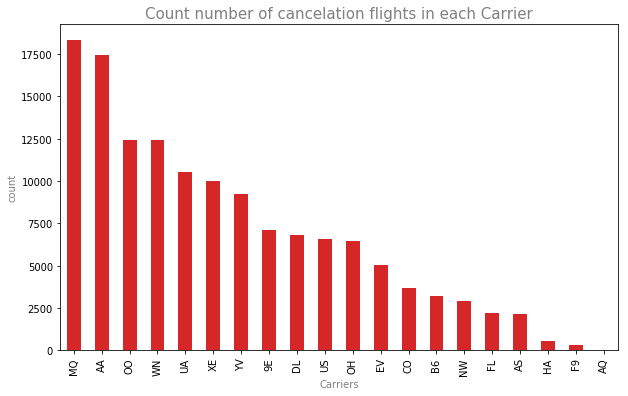

In [35]:
# bar chart for the Carrier by cancellation flight
base_color = sb.color_palette()[3]
Carrier_.plot(kind='bar', figsize=(10,6), color = base_color);

plt.title('Count number of cancelation flights in each Carrier', fontsize=15, color='grey')
plt.xlabel('Carriers', fontsize=10, color='grey')
plt.ylabel('count', fontsize=10, color='grey')

# save
plt.savefig('Carrier_by_cancellation_flight', dpi=70, bbox_inches='tight');

In [36]:
# search in where Code == MQ
carriers_[carriers_['Code'].str.match('MQ', na=False)]

,Code,Description
848,MQ,American Eagle Airlines Inc.


- we see in the above that **American Eagle Airlines Inc.(MQ)** carrier recorded as the most carrier with cancelation flights in **2008** at the United States with **18331** flights, with the difference in **891** flights with the second carrier **American Airlines Inc.(AA)**.
- And the **Aloha Airlines Inc.(AQ)** carrier recorded as the fewer carrier with cancelation with **42** flights.

### The most weekday for the flights and the less weekday

In [37]:
# function to count the percentage blocks for weekday

def percentage_blocks(df_2008_clean, weekday):
    """
    Take as input a dataframe and variable, and return a Pandas series with
    approximate percentage values for filling out a waffle plot.
    """
    # compute base quotas
    percentages = 100 * df_2008_clean[weekday].value_counts() / df_2008_clean.shape[0]
    counts = np.floor(percentages).astype(int) # integer part = minimum quota
    decimal = (percentages - counts).sort_values(ascending = False)

    # add in additional counts to reach 100
    rem = 100 - counts.sum()
    for cat in decimal.index[:rem]:
        counts[cat] += 1

    return counts

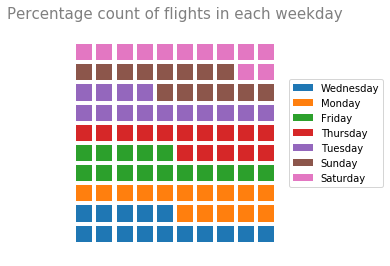

In [38]:
# waffle chart for percentage of count weekday 

waffle_counts = percentage_blocks(df_2008_clean, 'weekday')

prev_count = 0
# for each category,
for cat in range(waffle_counts.shape[0]):
    # get the block indices
    blocks = np.arange(prev_count, prev_count + waffle_counts[cat])
    # and put a block at each index's location
    x = blocks % 10 # use mod operation to get ones digit
    y = blocks // 10 # use floor division to get tens digit
    plt.bar(x = x, height = 0.8, width = 0.8, bottom = y)
    prev_count += waffle_counts[cat]

# aesthetic wrangling
plt.legend(waffle_counts.index, bbox_to_anchor = (1, 0.5), loc = 6)
plt.axis('off')
plt.axis('square');

plt.title('Percentage count of flights in each weekday', fontsize=15, color='grey')

# save
plt.savefig('weekday_percentage_count', dpi=70, bbox_inches='tight');

- we see in the waffle chart above that 12% of the count of flights goes to Saturday, 14% for Sunday, 14% for Tuesday, 15% for Thursday, 15% for Friday, 15% for Monday and 15% for Wednesday.
- we can conclude from these that the flights' scheduled got full-time work in weekday and got part-time of work on a weekend day. 
#### Note: The standard working week in the United States begins on Monday and ends on Friday, 40 hours per week, with Saturday and Sunday being weekend days.


### The most month for the flights and the less month.

In [39]:
# change format from object(string) to datetime

df_2008_clean['date']= pd.to_datetime(df_2008_clean['date']) 

In [40]:
# count for the month flights

month_count = df_2008_clean['date'].dt.month.value_counts() 
month_count

7     627931
3     616090
8     612279
6     608665
5     606293
1     605765
4     598126
2     569236
10    556205
12    544958
9     540908
11    523272
Name: date, dtype: int64

In [41]:
# get the order month from value count
month_order = df_2008_clean['date'].dt.month.value_counts().index

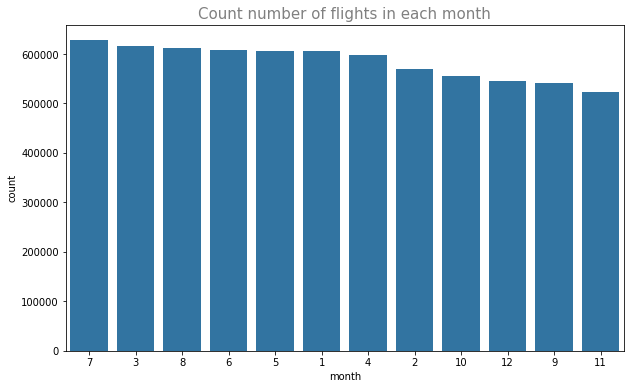

In [42]:
# bar chart for the count number of the flights in the months of the year

plt.figure(figsize=(10,6))
base_color = sb.color_palette()[0]
sb.countplot(df_2008_clean['date'].dt.month, color = base_color, order = month_order);

plt.title('Count number of flights in each month', fontsize=15, color='grey')
plt.xlabel('month', fontsize=10, color='black')

# save
plt.savefig('count_flights_in_the_month', dpi=70, bbox_inches='tight');

- we see here that the best month with the most flights is **July(7)** with **627931** and the less is **November(11)** with **523272** flights.
- Also, we know now that there are 7 months recorded as the large month of flights with up than **60k** flights, the months are(**July-March-August-June-May**).
- And the rest months got between **59k** flights and **52k**.

### The most day for the flights and the less day.

In [43]:
# count the day in date of flights
days_counts = df_2008_clean['date'].dt.day.value_counts() 
days_counts

21    234533
14    234285
18    234146
7     233797
11    233448
3     233259
17    233202
10    232989
29    231532
2     230865
22    230557
15    230379
24    229797
28    229613
8     229578
1     229292
20    229165
16    229085
23    229039
4     228649
5     228156
6     228117
25    228095
19    227487
12    227247
13    227233
9     227064
26    226590
27    222876
30    211685
31    127968
Name: date, dtype: int64

In [44]:
# get the order day from value count
days_order_ = df_2008_clean['date'].dt.day.value_counts().index

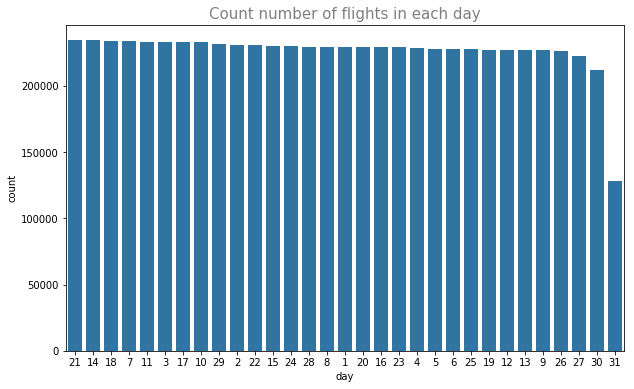

In [45]:
# bar chart for the count number of the flights in the days of the month

plt.figure(figsize=(10,6))
base_color = sb.color_palette()[0]
sb.countplot(df_2008_clean['date'].dt.day, color = base_color, order = days_order_);

plt.title('Count number of flights in each day', fontsize=15, color='grey')
plt.xlabel('day', fontsize=10, color='black')

# save
plt.savefig('count_flights_in_the_days', dpi=70, bbox_inches='tight');

- These days(**21, 14, 18, 7, 11, 3, 17, 10, 29, 2, 22, 15**) got **23k** flights, and the rest got **22k** flights.
- And the fewer days with flights is the (**31**), with **12k** flights, and that's because not all months have this day.

### What are the preferred times for flights to occur? Are there any changes over multiple years.

In [46]:
# A function which will take a `CRSDepTime` column and get the top value counts 

def valu_count(CRSDepTime):
    
    valu_count = df_2008_clean['CRSDepTime'].value_counts()
    
    top_val = pd.DataFrame({'count' :valu_count})
    
    return top_val

In [47]:
# Eight largest values in column `count`

top_val = valu_count('CRSDepTime')
sd = top_val.nlargest(8, ['count'])

# create new df
top_val_2008 = pd.DataFrame()

# append the 8 values
top_val_2008 = top_val_2008.append(sd)

# fix index
top_val_2008['time'] = top_val_2008.index
top_val_2008.reset_index(level=0, drop=True, inplace=True)
top_val_2008

,count,time
0,132059,600
1,91952,700
2,61154,800
3,56656,630
4,50596,730
5,48886,830
6,48759,900
7,43422,1100


In [48]:
# convert the number to time format
top_val_2008['newtime']= pd.to_datetime(top_val_2008.time, format = '%H%M').dt.time

# create year column
top_val_2008['year'] = '2008'
top_val_2008

,count,time,newtime,year
0,132059,600,06:00:00,2008
1,91952,700,07:00:00,2008
2,61154,800,08:00:00,2008
3,56656,630,06:30:00,2008
4,50596,730,07:30:00,2008
5,48886,830,08:30:00,2008
6,48759,900,09:00:00,2008
7,43422,1100,11:00:00,2008


In [49]:
132059 - 91952

40107

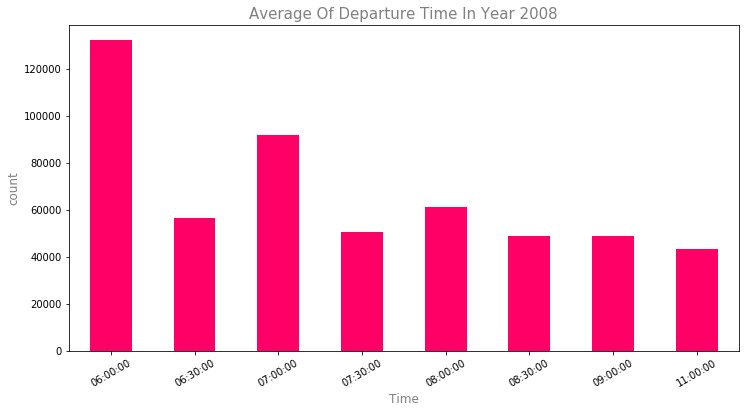

In [50]:
# plot bar chart to count Departure time for flights in the year 2008

top_val_2008.groupby('newtime')['count'].mean().plot(kind='bar', figsize = (12, 6), color = '#ff0066')

# Add a title of chart and for x, y labels
plt.title('Average Of Departure Time In Year 2008', fontsize=15, color='grey')
plt.xlabel('Time', fontsize=12, color='grey')
plt.ylabel('count', fontsize=12, color='grey');
plt.xticks(rotation = 30);

# save
plt.savefig('Average_Departure_Time_In_2008', dpi=70, bbox_inches='tight');

- In the **2008** year The preferred times for flight to occur was **6:00 AM** with **132059** flights and **7:00 AM** with **91952** flights with difference **40107** flight between them.

In [51]:
# A function which will take a `CRSDepTime` column and get the top value counts 

def valu_count_80(CRSDepTime):
    
    valu_count_80 = Flights_80['CRSDepTime'].value_counts()
    
    top_val_80 = pd.DataFrame({'count' :valu_count_80})
    
    return top_val_80

In [52]:
# Eight largest values in column `count`

top_val_80 = valu_count_80('CRSDepTime')
sk = top_val_80.nlargest(8, ['count'])

# create new df
top_val_80s = pd.DataFrame()

# append the 8 values
top_val_80s = top_val_80s.append(sk)

# fix index
top_val_80s['time'] = top_val_80s.index
top_val_80s.reset_index(level=0, drop=True, inplace=True)
top_val_80s

,count,time
0,139778,700
1,63283,800
2,56234,900
3,53695,1600
4,52088,1200
5,50184,1700
6,48667,1300
7,45996,1100


In [53]:
# convert the number to time format
top_val_80s['newtime']= pd.to_datetime(top_val_80s.time, format = '%H%M').dt.time

# create year column
top_val_80s['year'] = '80s'
top_val_80s

,count,time,newtime,year
0,139778,700,07:00:00,80s
1,63283,800,08:00:00,80s
2,56234,900,09:00:00,80s
3,53695,1600,16:00:00,80s
4,52088,1200,12:00:00,80s
5,50184,1700,17:00:00,80s
6,48667,1300,13:00:00,80s
7,45996,1100,11:00:00,80s


In [54]:
# A function which will take a `CRSDepTime` column and get the top value counts 

def valu_count_90(CRSDepTime):
    
    valu_count_90 = Flights_90['CRSDepTime'].value_counts()
    
    top_val_90 = pd.DataFrame({'count' :valu_count_90})
    
    return top_val_90

In [55]:
# Nine largest values in column `count`

top_val_90 = valu_count_90('CRSDepTime')
sh = top_val_90.nlargest(9, ['count'])

# create new df
top_val_90s = pd.DataFrame()

# append the 9 values
top_val_90s = top_val_90s.append(sh)

# fix index
top_val_90s['time'] = top_val_90s.index
top_val_90s.reset_index(level=0, drop=True, inplace=True)
top_val_90s

,count,time
0,226501,0
1,187024,700
2,105248,800
3,92030,630
4,89260,900
5,82551,1700
6,77569,1200
7,74986,600
8,74573,1600


In [56]:
# replace 0 value with null value
top_val_90s['time'] = top_val_90s['time'].replace(0, np.NaN)

In [57]:
# convert the number to time format
top_val_90s['newtime']= pd.to_datetime(top_val_90s.time, format = '%H%M').dt.time

# create year column
top_val_90s['year'] = '90s'
top_val_90s

,count,time,newtime,year
0,226501,NaN,NaT,90s
1,187024,700.0,07:00:00,90s
2,105248,800.0,08:00:00,90s
3,92030,630.0,06:30:00,90s
4,89260,900.0,09:00:00,90s
5,82551,1700.0,17:00:00,90s
6,77569,1200.0,12:00:00,90s
7,74986,600.0,06:00:00,90s
8,74573,1600.0,16:00:00,90s


In [58]:
# A function which will take a `CRSDepTime` column and get the top value counts 

def valu_count_20(CRSDepTime):
    
    valu_count_20 = Flights_20['CRSDepTime'].value_counts()
    
    top_val_20 = pd.DataFrame({'count' :valu_count_20})
    
    return top_val_20

In [59]:
# Eight largest values in column `count`

top_val_20 = valu_count_20('CRSDepTime')
sm = top_val_20.nlargest(8, ['count'])

# create new df
top_val_20s = pd.DataFrame()

# append the 8 values
top_val_20s = top_val_20s.append(sm)

# fix index
top_val_20s['time'] = top_val_20s.index
top_val_20s.reset_index(level=0, drop=True, inplace=True)
top_val_20s

,count,time
0,187863,600
1,181393,700
2,119188,800
3,114609,630
4,91521,900
5,91330,730
6,85027,830
7,84158,1700


In [60]:
# convert the number to time format
top_val_20s['newtime']= pd.to_datetime(top_val_20s.time, format = '%H%M').dt.time

# create year column
top_val_20s['year'] = '20s'
top_val_20s

,count,time,newtime,year
0,187863,600,06:00:00,20s
1,181393,700,07:00:00,20s
2,119188,800,08:00:00,20s
3,114609,630,06:30:00,20s
4,91521,900,09:00:00,20s
5,91330,730,07:30:00,20s
6,85027,830,08:30:00,20s
7,84158,1700,17:00:00,20s


In [61]:
187863 - 181393

6470

In [97]:
# Save on file for the presentation
top_val_80s.to_csv('top_val_80s.csv', encoding = 'utf-8', index=False)

In [98]:
# Save on file for the presentation
top_val_90s.to_csv('top_val_90s.csv', encoding = 'utf-8', index=False)

In [99]:
# Save on file for the presentation
top_val_20s.to_csv('top_val_20s.csv', encoding = 'utf-8', index=False)

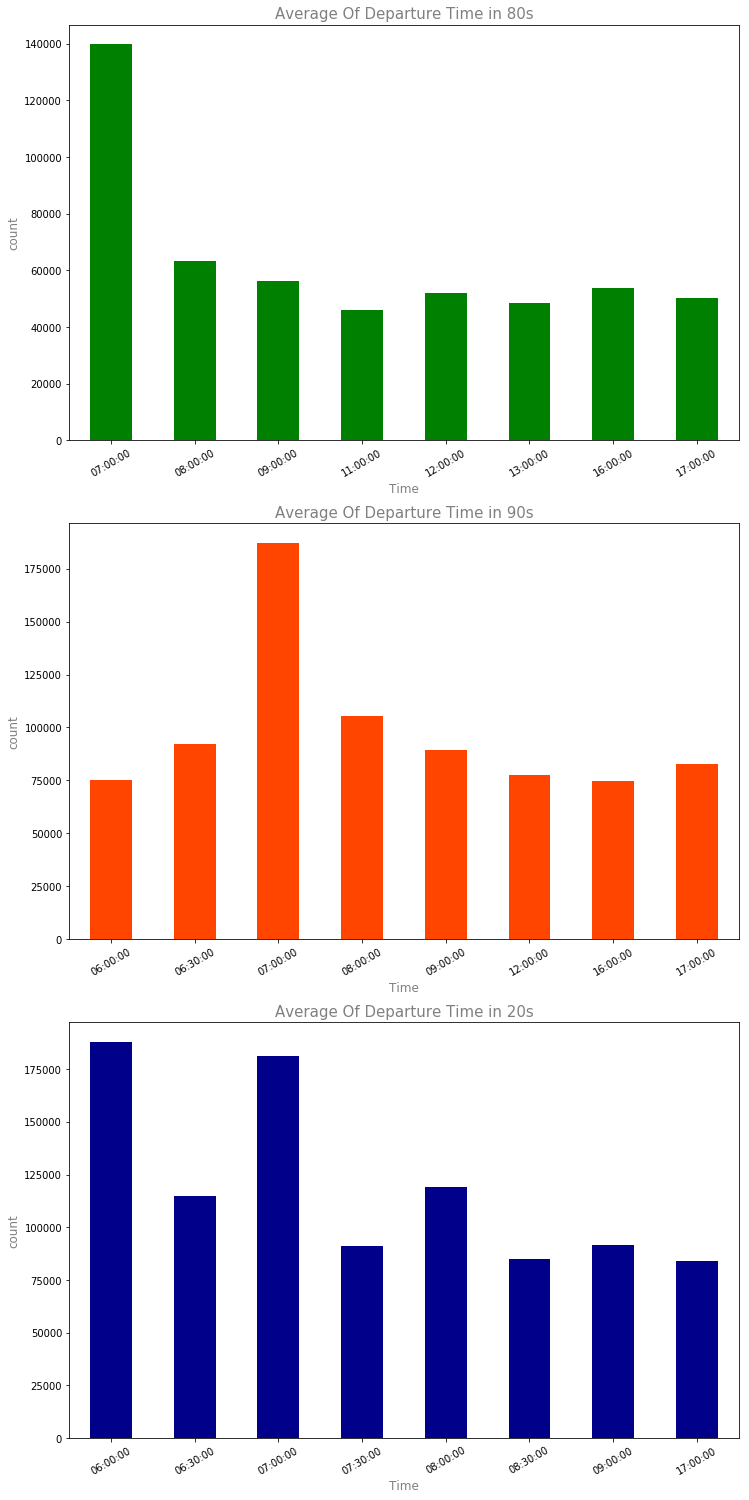

In [62]:
# plot bar charts to count Departure time for flights in the 80s, 90s, 20s

plt.figure(figsize = [12, 26])


plt.subplot(3, 1, 1)
top_val_80s.groupby('newtime')['count'].mean().plot(kind='bar', color = '#008000')
# Add a title of chart and for x, y labels
plt.title('Average Of Departure Time in 80s', fontsize=15, color='grey')
plt.xlabel('Time', fontsize=12, color='grey')
plt.ylabel('count', fontsize=12, color='grey');
plt.xticks(rotation = 30);




plt.subplot(3, 1, 2)
top_val_90s.groupby('newtime')['count'].mean().plot(kind='bar', color = '#FF4500')
# Add a title of chart and for x, y labels
plt.title('Average Of Departure Time in 90s', fontsize=15, color='grey')
plt.xlabel('Time', fontsize=12, color='grey')
plt.ylabel('count', fontsize=12, color='grey');
plt.xticks(rotation = 30);


plt.subplot(3, 1, 3)
top_val_20s.groupby('newtime')['count'].mean().plot(kind='bar', color = '#00008B')
# Add a title of chart and for x, y labels
plt.title('Average Of Departure Time in 20s', fontsize=15, color='grey')
plt.xlabel('Time', fontsize=12, color='grey')
plt.ylabel('count', fontsize=12, color='grey');
plt.xticks(rotation = 30);


# save
plt.savefig('Average_Departure_Time_Over_Years', dpi=70, bbox_inches='tight');

- In the **80s** The preferred time for the flight to occur was **7:00 AM** with **139778** flights with a large difference with the rest of times.
- Also, we found in the **90s** The preferred time for the flight to occur was **7:00 AM** with **226501** flights with a large difference with the rest of times either.
- But in the **20s** The preferred time for the flight to occur was **6:00 AM** with **187863** flights with a few difference with the **7:00 AM** that was got **181393** flights, and the difference just **6470** flights.

### Discussion on  the distributions of our variables and features

#### In our dataset, we checked the null values in all columns, and we found:
- There is a few null values on (DepTime-ArrTime-TailNum-ArrDelay-DepDelay) columns.
- Also, we found the fourth delay reason columns got approximately the same count of null values and there are large nulls, and that's mean the delay flights is not much in our dataset.
- And we found the CancellationCode got the biggest null values that are also mean there aren't much of canceled flights in our dataset.

#### In our analysis and when we check the features and data, we found:
- That all columns for delays have time in minutes, so we create a function to convert the delays minutes to an hour to get the right time for our visualize.
- In these columns(DepTime - CRSDepTime - ArrTime - CRSArrTime) we got the values as integer and float types and its represented as (local, hhmm), so to make our analysis easy and clear we convert these numbers to DateTime format as an hour and minutes and append it in a new column.

#### In our analysis and visualizes we make some steps on our data to serve us on this:
- we actually loaded an extra two datasets to got the full name for the carriers, origin IATA airport code, and destination IATA airport code.
- we used (dt.month - dt.day) methods to get the months and days in our date to make our visualize on it.
- We created a function which will take a `CRSDepTime` column and get the top value counts, then we create new dataframe to append these value and create anew column on it to the converted time.


## Bivariate Exploration

###  The relationship for arrival delay and departure delay with distance

In [63]:
# create df of a 500 sample rwos from the df 2008 flights
samp_flights = df_2008_clean.sample(500)
samp = pd.DataFrame() 
samp = samp.append(samp_flights)
samp

,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ArrDelay,DepDelay,Origin,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,date,weekday
6307942,2026.0,2015,2157.0,2140,MQ,4487,N830MQ,17.0,11.0,ORD,...,0,NaN,0,0.0,0.0,17.0,0.0,0.0,2008-11-07,Friday
899836,1511.0,1430,2227.0,2138,DL,946,N710TW,49.0,41.0,LAX,...,0,NaN,0,11.0,0.0,8.0,0.0,30.0,2008-02-22,Friday
5633207,1745.0,1415,1856.0,1537,US,767,N202UW,199.0,210.0,PHL,...,0,NaN,0,0.0,0.0,0.0,0.0,199.0,2008-10-13,Monday
5946152,1105.0,1105,1237.0,1240,WN,1764,N787SA,-3.0,0.0,SAN,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-11-04,Tuesday
684737,950.0,950,1044.0,1040,WN,342,N509SW,4.0,0.0,BNA,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-02-27,Wednesday
3444776,1704.0,1704,1815.0,1808,NW,1412,N984US,7.0,0.0,DTW,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-06-04,Wednesday
3670803,1101.0,1105,1220.0,1230,WN,3572,N436WN,-10.0,-4.0,SMF,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-07-22,Tuesday
6079678,1955.0,1945,2041.0,2032,OH,6464,N675BR,9.0,10.0,CVG,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-11-10,Monday
6392453,1823.0,1750,2109.0,2105,AA,1893,N3CEAA,4.0,33.0,BDL,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-11-21,Friday
3325289,1459.0,1450,1701.0,1654,EV,4493,N724EV,7.0,9.0,ATL,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-06-25,Wednesday


In [96]:
# Save on file for the presentation
samp.to_csv('samp.csv', encoding = 'utf-8', index=False)

In [64]:
samp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 6307942 to 5637233
Data columns (total 22 columns):
DepTime              490 non-null float64
CRSDepTime           500 non-null int64
ArrTime              490 non-null float64
CRSArrTime           500 non-null int64
UniqueCarrier        500 non-null object
FlightNum            500 non-null int64
TailNum              494 non-null object
ArrDelay             490 non-null float64
DepDelay             490 non-null float64
Origin               500 non-null object
Dest                 500 non-null object
Distance             500 non-null float64
Cancelled            500 non-null int64
CancellationCode     10 non-null object
Diverted             500 non-null int64
CarrierDelay         100 non-null float64
WeatherDelay         100 non-null float64
NASDelay             100 non-null float64
SecurityDelay        100 non-null float64
LateAircraftDelay    100 non-null float64
date                 500 non-null datetime64[ns]
weekday     

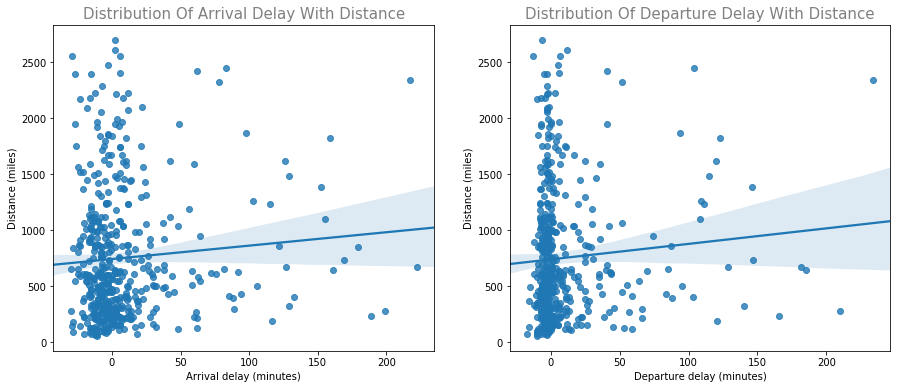

In [65]:
# scutter plots for the arrival delay & departure delay with distance

plt.figure(figsize = [15, 6])

# plot 1 - arrival
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
sb.regplot(data = samp, x = 'ArrDelay', y = 'Distance');
plt.xlabel('Arrival delay (minutes)')
plt.ylabel('Distance (miles)')
plt.title('Distribution Of Arrival Delay With Distance', fontsize=15, color='grey');

# plot 2 - departure
plt.subplot(1, 2, 2)
sb.regplot(data = samp, x = 'DepDelay', y = 'Distance');
plt.xlabel('Departure delay (minutes)')
plt.ylabel('Distance (miles)')
plt.title('Distribution Of Departure Delay With Distance', fontsize=15, color='grey');



# save
plt.savefig('arrival_departure_delay_with_distance', dpi=70, bbox_inches='tight');

- We can figure out that the distribution of distance with arrival and departure delay seems to be alike.
- There are a big distribution on the short miles, but it goes less on longest miles.
- There is a **positive correlation** between **distance** and **arrival delay**.
- Also, there is a **positive correlation** between **distance** and **departure delay**.

###  The relationship between the weekday for flights with long distance          

In [66]:
# count for the weekday value
samp['weekday'].value_counts()

Thursday     86
Friday       85
Wednesday    74
Tuesday      67
Sunday       64
Saturday     62
Monday       62
Name: weekday, dtype: int64

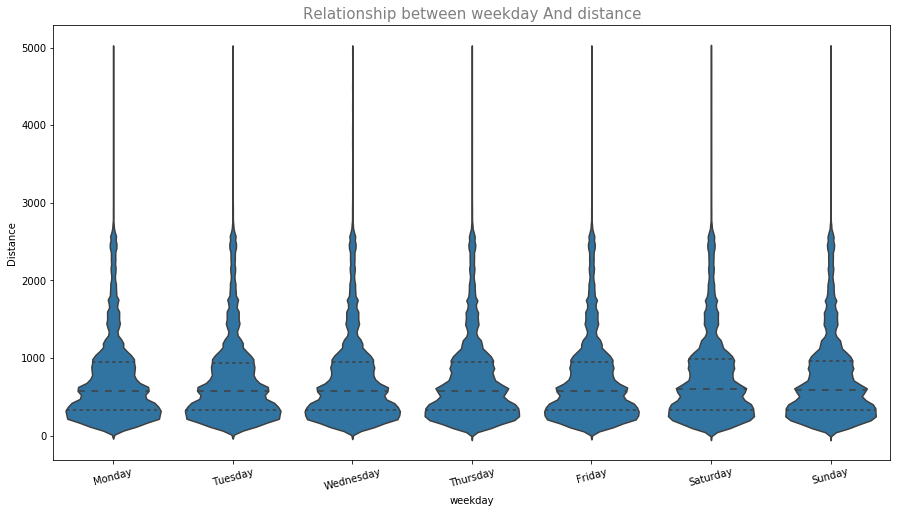

In [70]:
# Violin plot for the weekday with Distance

base_color = sb.color_palette()[0]
plt.figure(figsize = [15, 8])
sb.violinplot(data = df_2008_clean, x = 'weekday', y = 'Distance', order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                                                   'Friday', 'Saturday', 'Sunday'], 
              color = base_color, inner = 'quartile');

plt.xticks(rotation = 15);
plt.title('Relationship between weekday And distance', fontsize=15, color='grey');

# save
plt.savefig('relationship_weekday_with_distance', dpi=70, bbox_inches='tight');

- An area is plotted that shows the approximate density of Distance for each weekday.
- From this **Violin plot**, we can see that there is **a monotonic** relationship between distance and the weekday.
- The distribution for **all days** is much peaked.
- we can see the **all days** seem as alike, from approximately **1200 miles** to **3700 miles** the distribution are much tinier from the **1000 miles** and down.
- The longtails suggests outliers on all days with the highest of distance miles  from approximately **3700 miles** to over **5000 mails**.
- Finally, there isn't much different for the distribution on all days.

## Multivariate Exploration

### Are there a certain destination or arrival cities that are home to more delays with different Distance?

In [81]:
# create df of a 10000 sample rwos from the df 2008 flights
samp_flights_2 = df_2008_clean.sample(10000)
samp_2 = pd.DataFrame() 
samp_2 = samp.append(samp_flights_2)
samp_2.head()

,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ArrDelay,DepDelay,Origin,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,date,weekday
6307942,2026.0,2015,2157.0,2140,MQ,4487,N830MQ,17.0,11.0,ORD,...,0,NaN,0,0.0,0.0,17.0,0.0,0.0,2008-11-07,Friday
899836,1511.0,1430,2227.0,2138,DL,946,N710TW,49.0,41.0,LAX,...,0,NaN,0,11.0,0.0,8.0,0.0,30.0,2008-02-22,Friday
5633207,1745.0,1415,1856.0,1537,US,767,N202UW,199.0,210.0,PHL,...,0,NaN,0,0.0,0.0,0.0,0.0,199.0,2008-10-13,Monday
5946152,1105.0,1105,1237.0,1240,WN,1764,N787SA,-3.0,0.0,SAN,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-11-04,Tuesday
684737,950.0,950,1044.0,1040,WN,342,N509SW,4.0,0.0,BNA,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008-02-27,Wednesday


In [82]:
# A function which will take a `Dest` column and get the top value counts 

def valu_samp_2(Dest):
    
    valu_samp_2 = samp_2['Dest'].value_counts()
    
    top_samp_2 = pd.DataFrame({'count' :valu_samp_2})
    
    return top_samp_2

In [83]:
# four largest values in column `count`

top_val = valu_samp_2('Dest')
lrg = top_val.nlargest(4, ['count'])

# create new df
top_val_samp_2 = pd.DataFrame()

# append the 4 values
top_val_samp_2 = top_val_samp_2.append(lrg)

# fix index
top_val_samp_2['Dest'] = top_val_samp_2.index
top_val_samp_2.reset_index(level=0, drop=True, inplace=True)
top_val_samp_2

,count,Dest
0,574,ATL
1,541,ORD
2,460,DFW
3,347,DEN


In [84]:
# get the rows with 'Dest', 'Distance','LateAircraftDelay' columns , for ATL, ORD, DFW, DEN

col = ['Dest', 'Distance','LateAircraftDelay']

Dest_ATL = samp_2.query('Dest=="ATL"')[col]
Dest_ORD = samp_2.query('Dest=="ORD"')[col]
Dest_DFW = samp_2.query('Dest=="DFW"')[col]
Dest_DEN = samp_2.query('Dest=="DEN"')[col]

In [85]:
# merge the four df in one
dfs = [Dest_ATL, Dest_ORD, Dest_DFW, Dest_DEN]
Dest_samp_2 = pd.concat(dfs)
Dest_samp_2.head()

,Dest,Distance,LateAircraftDelay
899836,ATL,1946.0,30.0
2096019,ATL,545.0,NaN
2127893,ATL,300.0,NaN
6239200,ATL,508.0,NaN
4221386,ATL,665.0,0.0


In [86]:
# check the new df
Dest_samp_2['Dest'].value_counts()

ATL    574
ORD    541
DFW    460
DEN    347
Name: Dest, dtype: int64

In [87]:
# replace 0.0 with null value
Dest_samp_2= Dest_samp_2.replace(0.0, np.NaN)

In [88]:
# drop the null value
drop_Dest_samp_2 = Dest_samp_2.dropna()
drop_Dest_samp_2.head()

,Dest,Distance,LateAircraftDelay
899836,ATL,1946.0,30.0
2991797,ATL,227.0,39.0
955258,ATL,515.0,8.0
6772501,ATL,247.0,18.0
3311201,ATL,516.0,10.0


In [89]:
drop_Dest_samp_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 899836 to 1413436
Data columns (total 3 columns):
Dest                 210 non-null object
Distance             210 non-null float64
LateAircraftDelay    210 non-null float64
dtypes: float64(2), object(1)
memory usage: 6.6+ KB


In [95]:
# Save on file for presentation
drop_Dest_samp_2.to_csv('drop_Dest_samp_2.csv', encoding = 'utf-8', index=False)

In [91]:
# search in where Code == ATL
L_AIRPORT[L_AIRPORT['Code'].str.match('ATL', na=False)]

,Code,Description
429,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern..."


In [92]:
# search in where Code == ORD
L_AIRPORT[L_AIRPORT['Code'].str.match('ORD', na=False)]

,Code,Description
4127,ORD,"Chicago, IL: Chicago O'Hare International"


In [93]:
# search in where Code == DFW
L_AIRPORT[L_AIRPORT['Code'].str.match('DFW', na=False)]

,Code,Description
1382,DFW,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter..."


In [94]:
# search in where Code == DEN
L_AIRPORT[L_AIRPORT['Code'].str.match('DEN', na=False)]

,Code,Description
1377,DEN,"Denver, CO: Denver International"


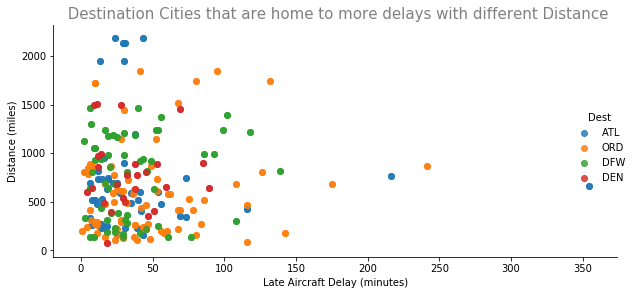

In [90]:
# FacetGrid plot for get the Dest city with LateAircraftDelay and Distance

g = sb.FacetGrid(data = drop_Dest_samp_2, hue ='Dest', height = 4, aspect = 2)
g = g.map(sb.regplot, "LateAircraftDelay", "Distance", fit_reg = False, )

g.add_legend()
g = g.map(sb.regplot,"LateAircraftDelay", "Distance", fit_reg=False);

# Add a title of chart and for x, y labels
plt.title(' Destination Cities that are home to more delays with different Distance', fontsize=15, color='grey')
plt.xlabel('Late Aircraft Delay (minutes)')
plt.ylabel('Distance (miles)');

# save
plt.savefig('Destination_Cities_delays_with_Distance', dpi=70, bbox_inches='tight');

- The longest delay is in **Atlanta(ATL)** destination with approximately **360 minutes**, and with approximately **750** or **800 miles**.
- The second-longest delay is in **Chicago(ORD)** destination with approximately **240 minutes**, and with **800** or **850 miles**.
- then also we have another long delay with **Chicago** and **Atlanta** destination, 
- Also, these destinations got the hight distance with a delay between **1** minute to **140 minutes**.
- The distribution for the delay with distance is got much distribution in the low distance then goes to less in the high distance.
- There is **a positive correlation** between **distance** and **late aircraft delay**.

## Data Investigation Summary

You can find our Investigation summarize in this file `readme.md`.

## Explanatory Data Analysis


You can find our Explanatory data analysis in this file `slide_deck.ipynb`.